# ***CAPSTONE PROJECT - 01 . ADVANCE HOUSE PRICE PREDICTION***

# **Import relevant modules and libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


# **Basic EDA(Exploratory Data Analysis)**

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


 **1.Stastical Analysis**

In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.shape

(5000, 7)

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**2.Missing values**

In [8]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


**3.Duplicate values**

In [9]:
df.duplicated().sum()

np.int64(0)

**4.Outliers / Anamolies Detection**

 1.Using Boxplot

<Axes: >

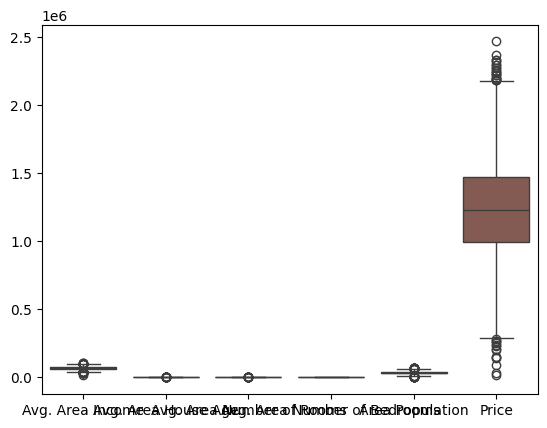

In [10]:
sns.boxplot(df)

In [11]:
for i in df.columns:
    if i == 'Address':
        pass
    else:
        print(i)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price


Avg. Area Income


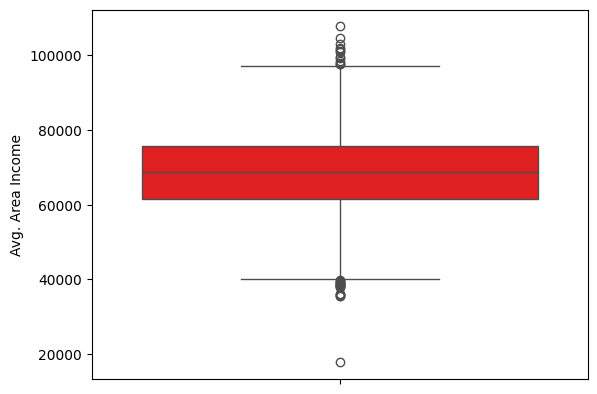

Avg. Area House Age


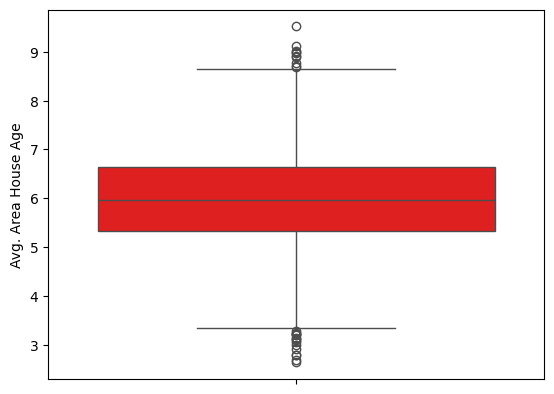

Avg. Area Number of Rooms


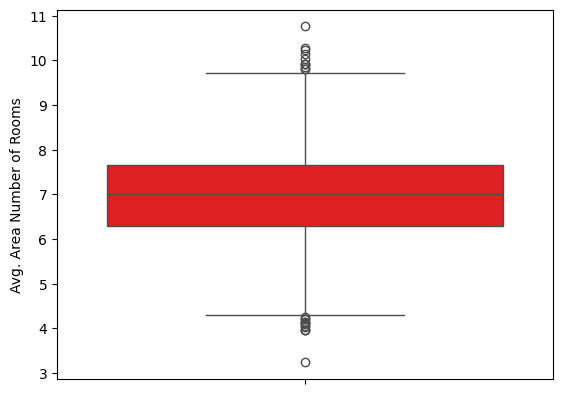

Avg. Area Number of Bedrooms


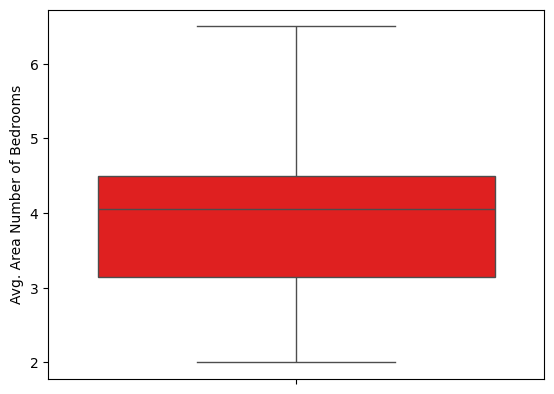

Area Population


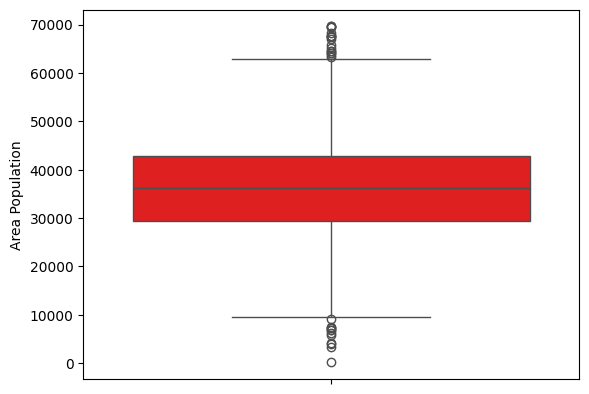

Price


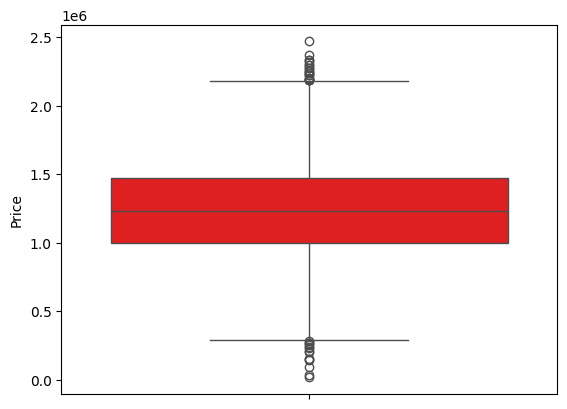

In [12]:
for i in df.columns:
    if i == 'Address':
        pass
    else:
        print(i)
        sns.boxplot(df[i], color='r')
        plt.show()

In [13]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


2.Using IQR

In [21]:
Q1 = df.quantile(0.25)
Q1

,0.25
Avg. Area Income,61480.562388
Avg. Area House Age,5.322283
Avg. Area Number of Rooms,6.299250
Avg. Area Number of Bedrooms,3.140000
Area Population,29403.928702
Price,997577.135049


In [22]:
Q3 = df.quantile(0.75)
Q3

,0.75
Avg. Area Income,7.578334e+04
Avg. Area House Age,6.650808e+00
Avg. Area Number of Rooms,7.665871e+00
Avg. Area Number of Bedrooms,4.490000e+00
Area Population,4.286129e+04
Price,1.471210e+06


In [23]:
IQR = Q3 - Q1
IQR

,0
Avg. Area Income,14302.776278
Avg. Area House Age,1.328525
Avg. Area Number of Rooms,1.366621
Avg. Area Number of Bedrooms,1.350000
Area Population,13457.362067
Price,473633.069163


In [24]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

lower_bound

,0
Avg. Area Income,40026.397972
Avg. Area House Age,3.329495
Avg. Area Number of Rooms,4.249318
Avg. Area Number of Bedrooms,1.115000
Area Population,9217.885601
Price,287127.531305


In [25]:
upper_bound

,0
Avg. Area Income,9.723750e+04
Avg. Area House Age,8.643597e+00
Avg. Area Number of Rooms,9.715803e+00
Avg. Area Number of Bedrooms,6.515000e+00
Area Population,6.304733e+04
Price,2.181660e+06


In [26]:
df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06
28,90499.057451,6.384359,4.242191,3.04,33970.164990,1.240764e+06
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05
90,48904.983269,4.844973,5.448956,3.38,32960.753070,2.018981e+05
228,66574.709994,5.550265,6.844150,2.17,69575.449464,1.702406e+06
...,...,...,...,...,...,...
4803,61846.135900,5.057578,7.681141,3.39,69621.713378,1.504316e+06
4844,37908.675863,6.233813,7.252916,6.07,39632.079786,8.804028e+05
4855,35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05
4859,73685.403658,8.916093,6.291818,3.05,36000.506028,1.798927e+06


In [27]:
df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06
28,90499.057451,6.384359,4.242191,3.04,33970.164990,1.240764e+06
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05
90,48904.983269,4.844973,5.448956,3.38,32960.753070,2.018981e+05
228,66574.709994,5.550265,6.844150,2.17,69575.449464,1.702406e+06
...,...,...,...,...,...,...
4803,61846.135900,5.057578,7.681141,3.39,69621.713378,1.504316e+06
4844,37908.675863,6.233813,7.252916,6.07,39632.079786,8.804028e+05
4855,35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05
4859,73685.403658,8.916093,6.291818,3.05,36000.506028,1.798927e+06


In [28]:
df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [29]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [30]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Avg. Area Income


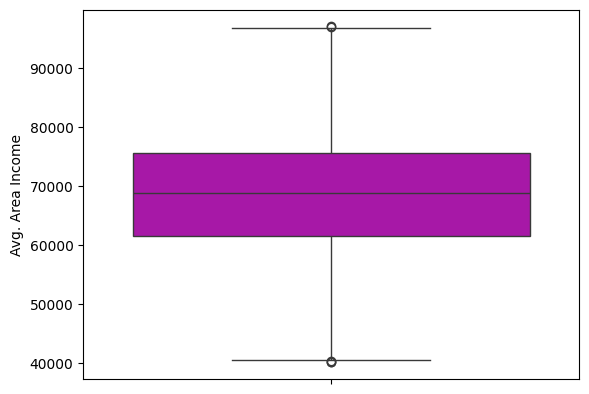

Avg. Area House Age


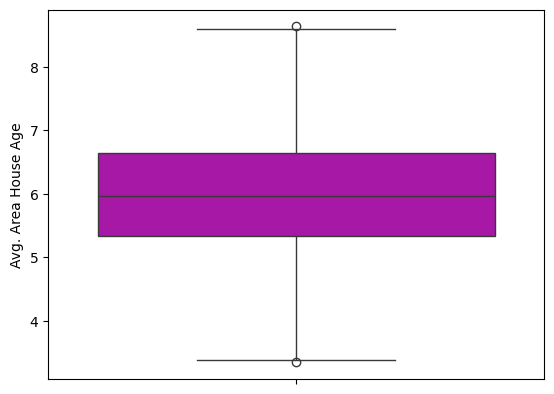

Avg. Area Number of Rooms


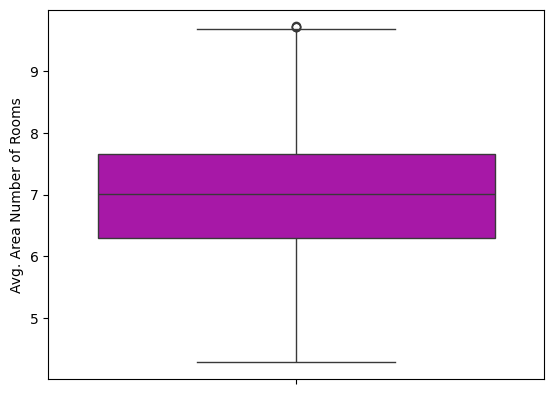

Avg. Area Number of Bedrooms


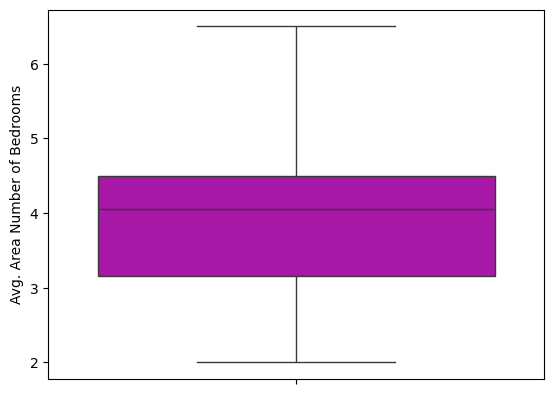

Area Population


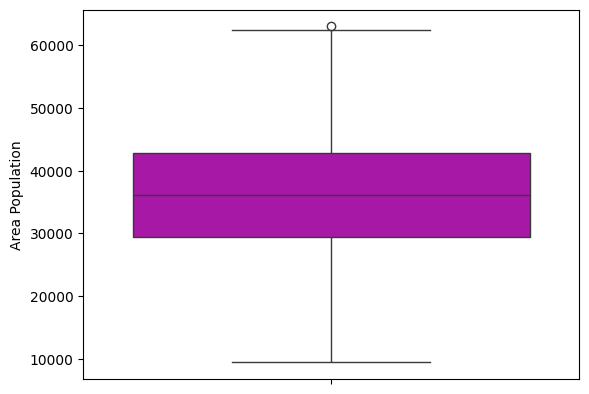

Price


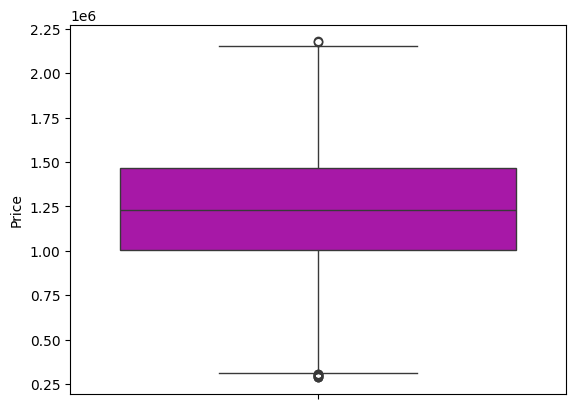

In [31]:
for i in df.columns:
    if i == 'Address':
        pass
    else:
        print(i)
        sns.boxplot(df[i], color='m')
        plt.show()

**5.Feature Encoding**

In [15]:
df=pd.read_csv('USA_Housing.csv')

In [16]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
df['Address']

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [18]:
df['Address'].value_counts()

,count
Address,
"37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595",1
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",1
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",1
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",1
USS Barnett\nFPO AP 44820,1
...,...
"209 Natasha Stream Suite 961\nHuffmanland, NE 52457",1
"911 Castillo Park Apt. 717\nDavisborough, PW 78603",1
"6368 John Motorway Suite 700\nJanetbury, NM 26854",1


In [19]:
del df['Address']

In [20]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


**6.Multi-Colliniearity**

In [32]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [33]:
d = df.drop(columns=['Price'], axis=1)
d

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [34]:
d.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000


<Axes: >

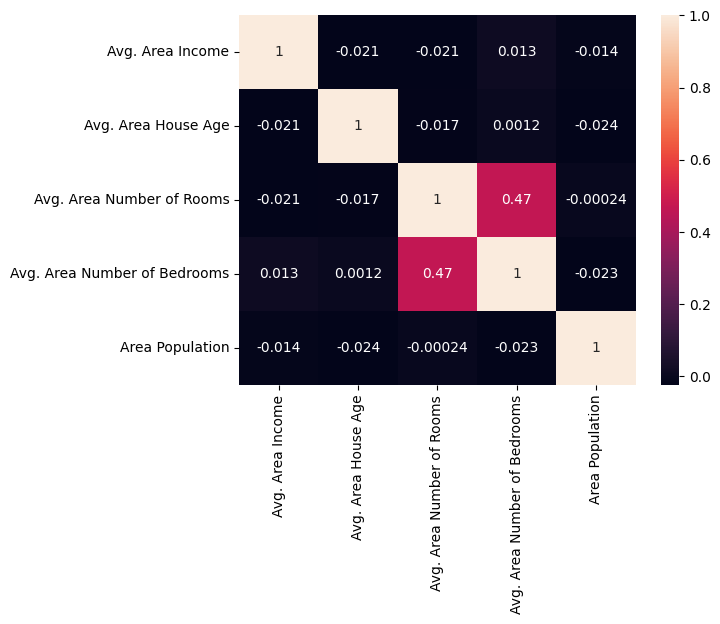

In [35]:
sns.heatmap(d.corr(), annot=True)

**7.Feature Selection**

In [36]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [37]:
df.corr()['Price']

,Price
Avg. Area Income,0.632031
Avg. Area House Age,0.441675
Avg. Area Number of Rooms,0.329630
Avg. Area Number of Bedrooms,0.168606
Area Population,0.406027
Price,1.000000


# **Model Building**

In [38]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


**1.Separate Independent and Dependent data**

In [39]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [40]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [41]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


**2.Split data into training and test**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599
184,82906.654801,5.901452,5.767366,4.26,38820.481944
4526,69664.075765,7.612180,5.945619,2.00,37012.993434
...,...,...,...,...,...
4551,79500.398946,8.554884,6.160048,3.29,32069.117413
478,62685.270752,6.057649,6.766130,2.17,42018.938568
3185,66469.369473,4.663863,6.117542,4.13,22670.608616
3881,59084.725195,7.086564,6.144059,2.11,42955.908360


In [44]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474
4874,67794.294771,8.104891,6.211783,2.45,25903.809477
...,...,...,...,...,...
1520,69882.273926,5.646558,5.647646,4.35,19544.751964
2610,55421.168887,8.223912,7.526952,3.07,30995.209936
2089,77033.913592,4.079782,8.441009,6.26,26160.161047
2331,79817.665761,6.019475,8.073787,5.41,31765.901385


In [45]:
y_train

,Price
2363,1.107160e+06
1887,9.782413e+05
3633,1.404036e+06
184,1.454943e+06
4526,1.074647e+06
...,...
4551,1.727983e+06
478,1.025461e+06
3185,4.122692e+05
3881,1.073254e+06


In [46]:
y_test

,Price
2250,1.300479e+06
4583,1.053485e+06
2729,1.009769e+06
2166,1.131041e+06
4874,1.343395e+06
...,...
1520,7.268839e+05
2610,1.403176e+06
2089,1.025418e+06
2331,1.428399e+06


In [47]:
X_train.shape, X_test.shape

((3892, 5), (973, 5))

In [48]:
y_train.shape, y_test.shape

((3892,), (973,))

# **Model Selection**

**1.Using Linear Regression**

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
lr.score(X_train, y_train)

0.911537564238988

In [51]:
lr.score(X_test, y_test)

0.9126986629438483

In [52]:
print(f'Training Accuracy : {round(lr.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy     : {round(lr.score(X_test, y_test), 2)*100}%')

Training Accuracy : 91.0%
Test Accuracy     : 91.0%


**2.Using KNN Algorithm**

In [53]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [54]:
print(f'Training Accuracy : {round(knn.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy     : {round(knn.score(X_test, y_test), 2)*100}%')

Training Accuracy : 64.0%
Test Accuracy     : 50.0%


**3.Using Decision Tree**

In [55]:
dtree = DecisionTreeRegressor(max_depth=9)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [56]:
print(f'Training Accuracy : {round(dtree.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy     : {round(dtree.score(X_test, y_test), 2)*100}%')

Training Accuracy : 92.0%
Test Accuracy     : 77.0%


# **Model Training - Linear Regression**

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
lr.coef_

array([2.15590620e+01, 1.65958273e+05, 1.19758233e+05, 1.06755714e+03,
       1.49866650e+01])

In [59]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [60]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficients/Weights'])

,Coefficients/Weights
Avg. Area Income,21.559062
Avg. Area House Age,165958.272744
Avg. Area Number of Rooms,119758.232952
Avg. Area Number of Bedrooms,1067.557140
Area Population,14.986665


# **Model Prediction**

In [61]:
lr

LinearRegression()

In [62]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [63]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599


In [64]:
y_train[:3]

,Price
2363,1.107160e+06
1887,9.782413e+05
3633,1.404036e+06


In [65]:
y_pred_train[:3]

array([1266013.93072291, 1026729.25636165, 1443436.66594479])

In [66]:
X_test[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516


In [67]:
y_test[:3]

,Price
2250,1.300479e+06
4583,1.053485e+06
2729,1.009769e+06


In [68]:
y_pred_test[:3]

array([1300879.08720861, 1045725.77688449,  969081.69718645])

# **Model Evaluation**

In [70]:
# Training Evaluation

def training_evaluation(actual, predicted):

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE      : {mse}')
    print(f'RMSE     : {rmse}')
    print(f'MAE      : {mae}')
    print(f'R2_Score : {r2}')
    print()

    plt.scatter(actual, predicted, color='r', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [predicted.min(), predicted.max()], color='k', lw=3, label='Predicted Price')
    plt.title('Best Fit Line - Training Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()

MSE      : 10083105986.347572
RMSE     : 100414.67017496782
MAE      : 80921.16373101504
R2_Score : 0.911537564238988



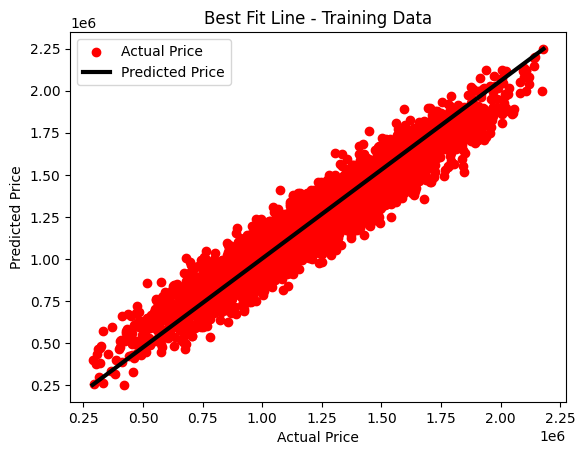

In [71]:
training_evaluation(y_train, y_pred_train)

In [72]:
# Test Evaluation

def test_evaluation(actual, predicted):

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE      : {mse}')
    print(f'RMSE     : {rmse}')
    print(f'MAE      : {mae}')
    print(f'R2_Score : {r2}')
    print()

    plt.scatter(actual, predicted, color='g', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [predicted.min(), predicted.max()], color='k', lw=3, label='Predicted Price')
    plt.title('Best Fit Line - Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()

MSE      : 10295321311.369093
RMSE     : 101465.86278827522
MAE      : 81137.45704516889
R2_Score : 0.9126986629438483



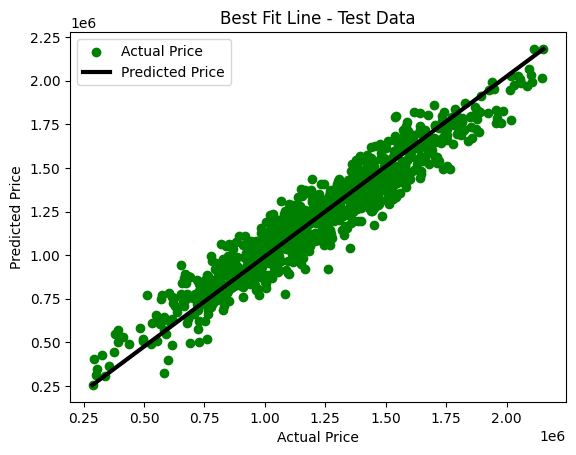

In [73]:
test_evaluation(y_test, y_pred_test)